In [ ]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding, GRU, Bidirectional
from keras.optimizers import rmsprop_v2  #module object is not callable
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.models import Sequential
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Modified-spam.csv',delimiter=',',encoding='latin-1') #Load Dataset
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5712,ham,A difficult day for jroot nevertheless,NaN,NaN,NaN
5713,ham,Who'll be the player of the final.,NaN,NaN,NaN
5714,ham,Prizes for guessing what @cheteshwar is tellin...,NaN,NaN,NaN
5715,ham,No bowler has dismissed more players for a duc...,NaN,NaN,NaN
5716,ham,Anyone else max it out already? Check my lates...,NaN,NaN,NaN
5717,ham,The sterling fella looks familiar.,NaN,NaN,NaN
5718,ham,Apply now for a demo session on IELTS mastercl...,NaN,NaN,NaN
5719,ham,"Learn top trending skill for free, giveaway fo...",NaN,NaN,NaN
5720,spam,Want to watch the latest movies on netflix? Th...,NaN,NaN,NaN
5721,ham,Pokemon master journeys starts from ep 48,NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True) #Remove Useless Attributes
print(df.head(10))
print('\nThe size of the dataset in tuples and attributes is ',df.shape)

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

The size of the dataset in tuples and attributes is  (5722, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Class Labels')

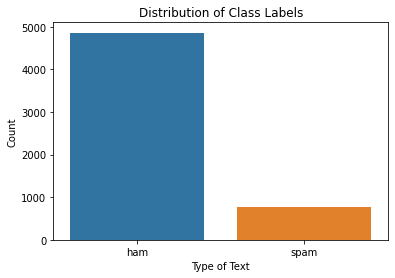

In [ ]:
sns.countplot(df.v1)  #Visualize number of Spams and Hams using a Counter-Plot
plt.xlabel('Type of Text')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')

In [ ]:
print("The following sentences are examples of spam ",df[df["v1"]=="spam"].head(),end='\n\n') #Spam Examples
print("The following sentences are examples of non-spam or ham ",df[df["v1"]=="ham"].head()) #Ham Examples

The following sentences are examples of spam        v1                                                 v2
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
5   spam  FreeMsg Hey there darling it's been 3 week's n...
8   spam  WINNER!! As a valued network customer you have...
9   spam  Had your mobile 11 months or more? U R entitle...
11  spam  SIX chances to win CASH! From 100 to 20,000 po...

The following sentences are examples of non-spam or ham      v1                                                 v2
0  ham  Go until jurong point, crazy.. Available only ...
1  ham                      Ok lar... Joking wif u oni...
3  ham  U dun say so early hor... U c already then say...
4  ham  Nah I don't think he goes to usf, he lives aro...
6  ham  Even my brother is not like to speak with me. ...


In [ ]:
X=df.v2
Y=df.v1
le=LabelEncoder() #Convert the Class-Labels from Hams and Spams into 0s and 1s respectively
Y=le.fit_transform(Y)
Y=Y.reshape(-1,1)

In [ ]:
print('A sample of encoded labels are ',Y[-6:-1],sep='\n')

A sample of encoded labels are 
[[1]
 [1]
 [1]
 [0]
 [0]]


In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3) #Train Test Split
#Next let's tokennize the data
max_words=1000
max_len=150
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(Xtrain)
sequences=tok.texts_to_sequences(Xtrain)
seq_matrix=sequence.pad_sequences(sequences,maxlen=max_len)
print('This is a sample of the padded sequence for the text ',seq_matrix[:2][:],sep='\n') #Creating Sequence Matrix


This is a sample of the padded sequence for the text 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   2   1 215   4 421  58 185  25   4  14  42  41  68   8  36   1
  371  42  41 346  13 713]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  

In [ ]:
def RNN():
  inputs=Input(name='Inputs',shape=[max_len])
  layer=Embedding(max_words,50,input_length=max_len)(inputs)   
  layer=LSTM(64)(layer)                                                #LSTM implementation
  layer=Dense(256,name='FC1')(layer)
  layer=Activation('relu')(layer)
  layer=Dropout(0.5)(layer)
  layer=Dense(1,name='out_layer')(layer)
  layer=Activation('sigmoid')(layer)
  model=Model(inputs=inputs,outputs=layer)
  return model


In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=rmsprop_v2.RMSProp(),metrics=['accuracy']) #Configure the model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
'''def RNN2():
  inputs=Input(name='Inputs',shape=[max_len])
  layer=Embedding(max_words,50,input_length=max_len)(inputs)  #GRU
  layer=GRU(64)(layer) 
  layer=Dropout(0.5)(layer)
  layer=Dense(1,name='out_layer')(layer)
  layer=Activation('sigmoid')(layer)
  model=Model(inputs=inputs,outputs=layer)
  return model'''
 

In [ ]:
'''model = RNN2()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=rmsprop_v2.RMSProp(),metrics=['accuracy']) #Configure the model'''

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                22272     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 65        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 72,337
Trainable params: 72,337
Non-trainable params: 0
_______________________________________________________

In [ ]:
md1=model.fit(seq_matrix,Ytrain,batch_size=128,epochs=7,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]) #Fit the model

Epoch 1/7
26/26 [==============================] - 6s 143ms/step - loss: 0.3644 - accuracy: 0.8555 - val_loss: 0.1685 - val_accuracy: 0.9563


In [ ]:
tst_sequences=tok.texts_to_sequences(Xtest)
tst_sequences_matrix=sequence.pad_sequences(tst_sequences,maxlen=max_len) #Creating Sequence Matrix for the Test Set

In [ ]:
accr = model.evaluate(tst_sequences_matrix,Ytest)

53/53 [==============================] - 1s 18ms/step - loss: 0.0616 - accuracy: 0.9822


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.062
  Accuracy: 0.982


In [ ]:
print(accr)

[0.18980620801448822, 0.9519572854042053]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score 
predictions_nn_test = model.predict(tst_sequences_matrix)
        
for i in range(len(predictions_nn_test)): #Convert continous values of YPred to Discrete Values
    if predictions_nn_test[i][0] < 0.5:
        predictions_nn_test[i][0] = 0
    else:
        predictions_nn_test[i][0] = 1
print('Test accuracy = ', round(accuracy_score(Ytest, predictions_nn_test),2)) #Print required metrics from confusion matrix
print('Test precision = ', round(precision_score(Ytest, predictions_nn_test),2))
print('Test Recall = ',round(recall_score(Ytest, predictions_nn_test),2))
print('Overall F1-Score = ',round(f1_score(Ytest,predictions_nn_test),2))
cnf_matrix_test = confusion_matrix(Ytest, predictions_nn_test)
print(cnf_matrix_test)

Test accuracy =  0.96
Test precision =  0.99
Test Recall =  0.67
Overall F1-Score =  0.8
[[1493    1]
 [  73  150]]


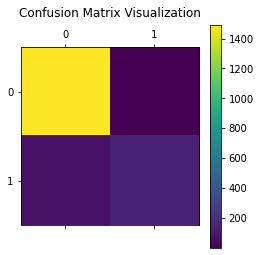

In [ ]:
import pylab as pl
pl.matshow(cnf_matrix_test)
pl.title('Confusion Matrix Visualization\n') #View confusion matrix
pl.colorbar()
pl.show()

In [ ]:
from sklearn.metrics import mean_squared_error,jaccard_score  #Evaluate model using similarity measures
from math import sqrt
def square_rooted(x):
  return round(sqrt(sum([a**2 for a in x])),3) 
def cosine_similarity(x,y):
  numerator=sum(a*b for a,b in zip(x,y))
  denominator=square_rooted(x)*square_rooted(y)
  return numerator/float(denominator)
#print('The RMSE =',round(sqrt(mean_squared_error(Ytest,predictions_nn_test)),2))
print('The Jaccard Similarity =',round(jaccard_score(Ytest,predictions_nn_test),2))
print('The Cosine Similarity =',round(cosine_similarity(Ytest,predictions_nn_test)[0],2))

The Jaccard Similarity = 0.67
The Cosine Similarity = 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy =  0.87
Test precision =  0.49
Test Recall =  0.44
Overall F1-Score =  0.46
The Jaccard Similarity = 0.3
The Cosine Similarity = 0.46


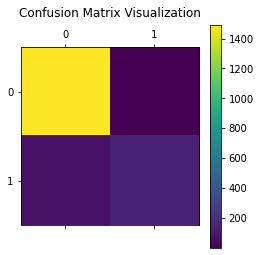

In [ ]:
#MLP implementation 
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd',activation='relu',learning_rate='constant')
clf.fit(seq_matrix, Ytrain)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
predictions_nn_test = clf.predict(tst_sequences_matrix)  
print('Test accuracy = ', round(accuracy_score(Ytest, predictions_nn_test),2))
print('Test precision = ', round(precision_score(Ytest, predictions_nn_test),2))
print('Test Recall = ',round(recall_score(Ytest, predictions_nn_test),2))
print('Overall F1-Score = ',round(f1_score(Ytest,predictions_nn_test),2))
print('The Jaccard Similarity =',round(jaccard_score(Ytest,predictions_nn_test),2))
print('The Cosine Similarity =',round(cosine_similarity(Ytest,predictions_nn_test)[0],2))
pl.matshow(cnf_matrix_test)
pl.title('Confusion Matrix Visualization\n')
pl.colorbar()
pl.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy =  0.89
Test precision =  0.79
Test Recall =  0.31
Overall F1-Score =  0.44
The Jaccard Similarity = 0.28
The Cosine Similarity = 0.49


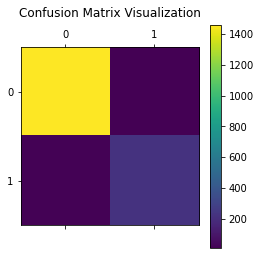

In [ ]:
from sklearn import svm
svmobj=svm.SVC()
svmobj.fit(seq_matrix,Ytrain)
predictions_nn_test = svmobj.predict(tst_sequences_matrix) 
print('Test accuracy = ', round(accuracy_score(Ytest, predictions_nn_test),2))
print('Test precision = ', round(precision_score(Ytest, predictions_nn_test),2))
print('Test Recall = ',round(recall_score(Ytest, predictions_nn_test),2))
print('Overall F1-Score = ',round(f1_score(Ytest,predictions_nn_test),2))
print('The Jaccard Similarity =',round(jaccard_score(Ytest,predictions_nn_test),2))
print('The Cosine Similarity =',round(cosine_similarity(Ytest,predictions_nn_test)[0],2))
pl.matshow(cnf_matrix_test)
pl.title('Confusion Matrix Visualization\n')
pl.colorbar()
pl.show()

Test accuracy =  0.16
Test precision =  0.13
Test Recall =  1.0
Overall F1-Score =  0.24
The Jaccard Similarity = 0.13
The Cosine Similarity = 0.37


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


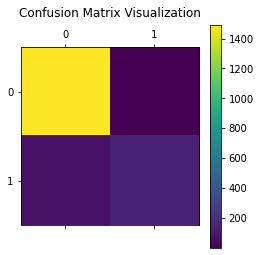

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbobj=GaussianNB()
nbobj.fit(seq_matrix,Ytrain)
predictions_nn_test = nbobj.predict(tst_sequences_matrix) 
print('Test accuracy = ', round(accuracy_score(Ytest, predictions_nn_test),2))
print('Test precision = ', round(precision_score(Ytest, predictions_nn_test),2))
print('Test Recall = ',round(recall_score(Ytest, predictions_nn_test),2))
print('Overall F1-Score = ',round(f1_score(Ytest,predictions_nn_test),2))
print('The Jaccard Similarity =',round(jaccard_score(Ytest,predictions_nn_test),2))
print('The Cosine Similarity =',round(cosine_similarity(Ytest,predictions_nn_test)[0],2))
pl.matshow(cnf_matrix_test)
pl.title('Confusion Matrix Visualization\n')
pl.colorbar()
pl.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Test accuracy =  0.88
Test precision =  0.58
Test Recall =  0.33
Overall F1-Score =  0.42
The Jaccard Similarity = 0.26
The Cosine Similarity = 0.44


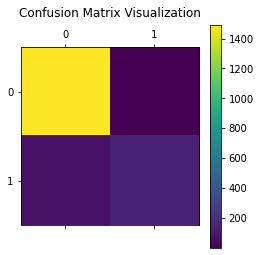

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kobj=KNeighborsClassifier(n_neighbors=5,p=2)
kobj.fit(seq_matrix,Ytrain)
predictions_nn_test = kobj.predict(tst_sequences_matrix) 
print('Test accuracy = ', round(accuracy_score(Ytest, predictions_nn_test),2))
print('Test precision = ', round(precision_score(Ytest, predictions_nn_test),2))
print('Test Recall = ',round(recall_score(Ytest, predictions_nn_test),2))
print('Overall F1-Score = ',round(f1_score(Ytest,predictions_nn_test),2))
print('The Jaccard Similarity =',round(jaccard_score(Ytest,predictions_nn_test),2))
print('The Cosine Similarity =',round(cosine_similarity(Ytest,predictions_nn_test)[0],2))
pl.matshow(cnf_matrix_test)
pl.title('Confusion Matrix Visualization\n')
pl.colorbar()
pl.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Test accuracy =  0.93
Test precision =  0.92
Test Recall =  0.53
Overall F1-Score =  0.67
The Jaccard Similarity = 0.51
The Cosine Similarity = 0.7


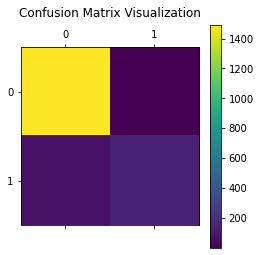

In [ ]:
#RF implementation 
from sklearn.ensemble import RandomForestClassifier
randomft = RandomForestClassifier(n_estimators=200,criterion='gini')
randomft.fit(seq_matrix, Ytrain)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
predictions_nn_test = randomft.predict(tst_sequences_matrix)  
print('Test accuracy = ', round(accuracy_score(Ytest, predictions_nn_test),2))
print('Test precision = ', round(precision_score(Ytest, predictions_nn_test),2))
print('Test Recall = ',round(recall_score(Ytest, predictions_nn_test),2))
print('Overall F1-Score = ',round(f1_score(Ytest,predictions_nn_test),2))
print('The Jaccard Similarity =',round(jaccard_score(Ytest,predictions_nn_test),2))
print('The Cosine Similarity =',round(cosine_similarity(Ytest,predictions_nn_test)[0],2))
pl.matshow(cnf_matrix_test)
pl.title('Confusion Matrix Visualization\n')
pl.colorbar()
pl.show()